### Understanding pandas

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
path = r"D:\handson\DAY2\data\iris.csv"
iris = pd.read_csv(path)

<b> meta data </b>

In [6]:
iris.head()  # 5 rows 
iris.dtypes  #columns wise , object means str in pandas
iris.index   #index is row ids 
iris.columns
len(iris)  # no of rows

150

<b>Accessing</b>

In [7]:
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [11]:
iris.SepalLength 
#OR 
iris['SepalLength']  
type(iris.SepalLength)  # Series

#access multiple 
iris[['SepalLength', 'PetalLength']]  # type is pd.DataFrame

SepalLength  PetalLength
0            5.1          1.4
1            4.9          1.4
2            4.7          1.3
3            4.6          1.5
4            5.0          1.4
..           ...          ...
145          6.7          5.2
146          6.3          5.0
147          6.5          5.2
148          6.2          5.4
149          5.9          5.1

[150 rows x 2 columns]

In [12]:
# .loc[row_id, column_names], row_ids may contain :, end is inclusize
#.iloc[row_index, column_index], here for :, end is not included
iris.iloc[0:3,:] == iris.loc[0:2, :]

SepalLength  SepalWidth  PetalLength  PetalWidth  Name
0         True        True         True        True  True
1         True        True         True        True  True
2         True        True         True        True  True

In [14]:
iris.iloc[:, [0,1,2]]  #list of columns 
iris.loc[:, 'SepalLength': 'PetalLength']

SepalLength  SepalWidth  PetalLength
0            5.1         3.5          1.4
1            4.9         3.0          1.4
2            4.7         3.2          1.3
3            4.6         3.1          1.5
4            5.0         3.6          1.4
..           ...         ...          ...
145          6.7         3.0          5.2
146          6.3         2.5          5.0
147          6.5         3.0          5.2
148          6.2         3.4          5.4
149          5.9         3.0          5.1

[150 rows x 3 columns]

In [19]:
#loc can have boolean query in row position
iris.SepalLength.mean()
iris.loc[iris.SepalLength > iris.SepalLength.mean(), :].reset_index() 
# index would be moved to a new column
#drop the index 
iris.loc[iris.SepalLength > iris.SepalLength.mean(), :].reset_index() .drop(columns="index")

SepalLength  SepalWidth  PetalLength  PetalWidth             Name
0           7.0         3.2          4.7         1.4  Iris-versicolor
1           6.4         3.2          4.5         1.5  Iris-versicolor
2           6.9         3.1          4.9         1.5  Iris-versicolor
3           6.5         2.8          4.6         1.5  Iris-versicolor
4           6.3         3.3          4.7         1.6  Iris-versicolor
..          ...         ...          ...         ...              ...
65          6.7         3.0          5.2         2.3   Iris-virginica
66          6.3         2.5          5.0         1.9   Iris-virginica
67          6.5         3.0          5.2         2.0   Iris-virginica
68          6.2         3.4          5.4         2.3   Iris-virginica
69          5.9         3.0          5.1         1.8   Iris-virginica

[70 rows x 5 columns]

<b> Create new column </b>

In [22]:
iris['dummy'] = iris.SepalLength - 2* iris.PetalLength -2 #elementwise 
iris.dummy
#apply fn - it has tobe numpy fn or ufunc
iris['dummy'] = np.abs(iris.dummy)

### handling NA or nan data

In [27]:
iris.drop(columns=["dummy"], inplace=True)

In [39]:
dict(zip(df.columns, [*[df[c].mean() for c in iris.columns[:-1]], np.nan]))

{'SepalLength': 5.843333333333334,
 'SepalWidth': 3.0540000000000003,
 'PetalLength': 3.758666666666666,
 'PetalWidth': 1.1986666666666668,
 'Name': nan}

In [42]:
df = iris.copy()
len(df.Name[df.Name.isnull()]) # no nan or null data 
#let us append one row with Name nan 
df1 = pd.DataFrame(dict(zip(df.columns, [*[df[c].mean() for c in iris.columns[:-1]], np.nan])), index=[0])
df = pd.concat([df,df1], axis=0).reset_index().drop(columns='index')  # rowwise 
df.tail()

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
146     6.300000       2.500     5.000000    1.900000  Iris-virginica
147     6.500000       3.000     5.200000    2.000000  Iris-virginica
148     6.200000       3.400     5.400000    2.300000  Iris-virginica
149     5.900000       3.000     5.100000    1.800000  Iris-virginica
150     5.843333       3.054     3.758667    1.198667             NaN

In [37]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [45]:
#NAN - replace NAN something, or remove that rows 
#replace
df.loc[df.Name.isnull(), :]

SepalLength  SepalWidth  PetalLength  PetalWidth Name
150     5.843333       3.054     3.758667    1.198667  NaN

In [48]:
df.replace({'Name':{np.nan: 0}})
df.dropna(axis=0, how='any')  #axis = row, any Nan drop 

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0       5.100000       3.500     1.400000    0.200000     Iris-setosa
1       4.900000       3.000     1.400000    0.200000     Iris-setosa
2       4.700000       3.200     1.300000    0.200000     Iris-setosa
3       4.600000       3.100     1.500000    0.200000     Iris-setosa
4       5.000000       3.600     1.400000    0.200000     Iris-setosa
..           ...         ...          ...         ...             ...
146     6.300000       2.500     5.000000    1.900000  Iris-virginica
147     6.500000       3.000     5.200000    2.000000  Iris-virginica
148     6.200000       3.400     5.400000    2.300000  Iris-virginica
149     5.900000       3.000     5.100000    1.800000  Iris-virginica
150     5.843333       3.054     3.758667    1.198667               0

[151 rows x 5 columns]

### Applying fn

In [52]:
iris.SepalLength.mean()
iris.mean(axis=0)  #columnwise
iris.mean(axis=1)  # rowwise

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [53]:
iris.describe()

SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

In [54]:
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [55]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [59]:
gr = iris.groupby('Name')
gr.mean()
gr.agg({'SepalLength': ['mean', np.std,'count']}).to_excel('processed.xlsx')

### plot

<AxesSubplot:>

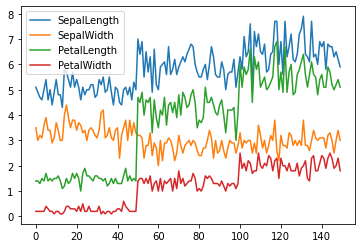

In [60]:
iris.iloc[:, 0:4].plot(kind='line')

### TO DB


In [3]:
from sqlalchemy import create_engine
con = create_engine('sqlite:///iris_database.db', echo=False)

In [5]:
iris.to_sql('iris', con=con)
res = con.execute("select avg(SepalLength), count(*) from iris group by Name").fetchall()
print(res)
iris2 = pd.read_sql('iris', con=con)
iris2.head()

TypeError: __init__() got multiple values for argument 'schema'